# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [27]:
import os
import cv2
import numpy as np
import pandas as pd

from collections import Counter, OrderedDict
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

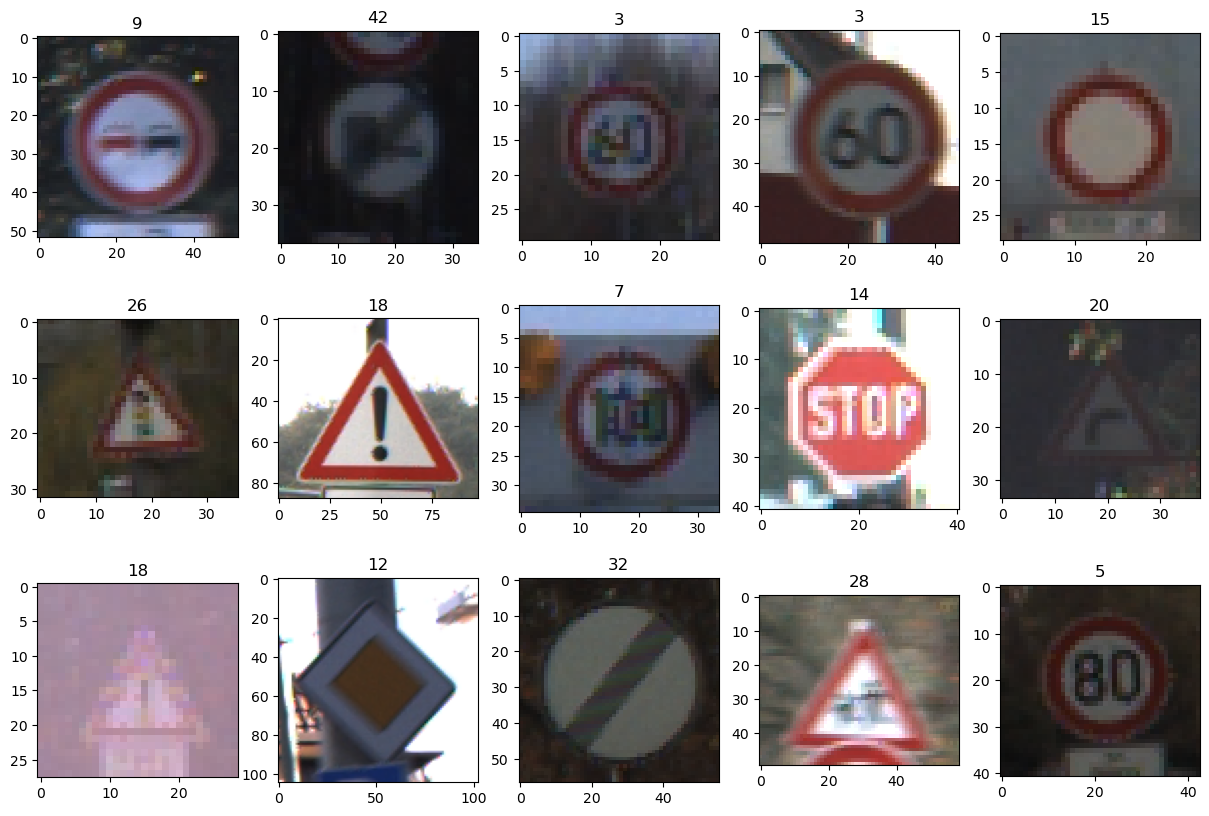

In [18]:
# Load the training labels
root = 'C:\\Users\\anton\\Downloads\\archive' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data['Path'])

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [21]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

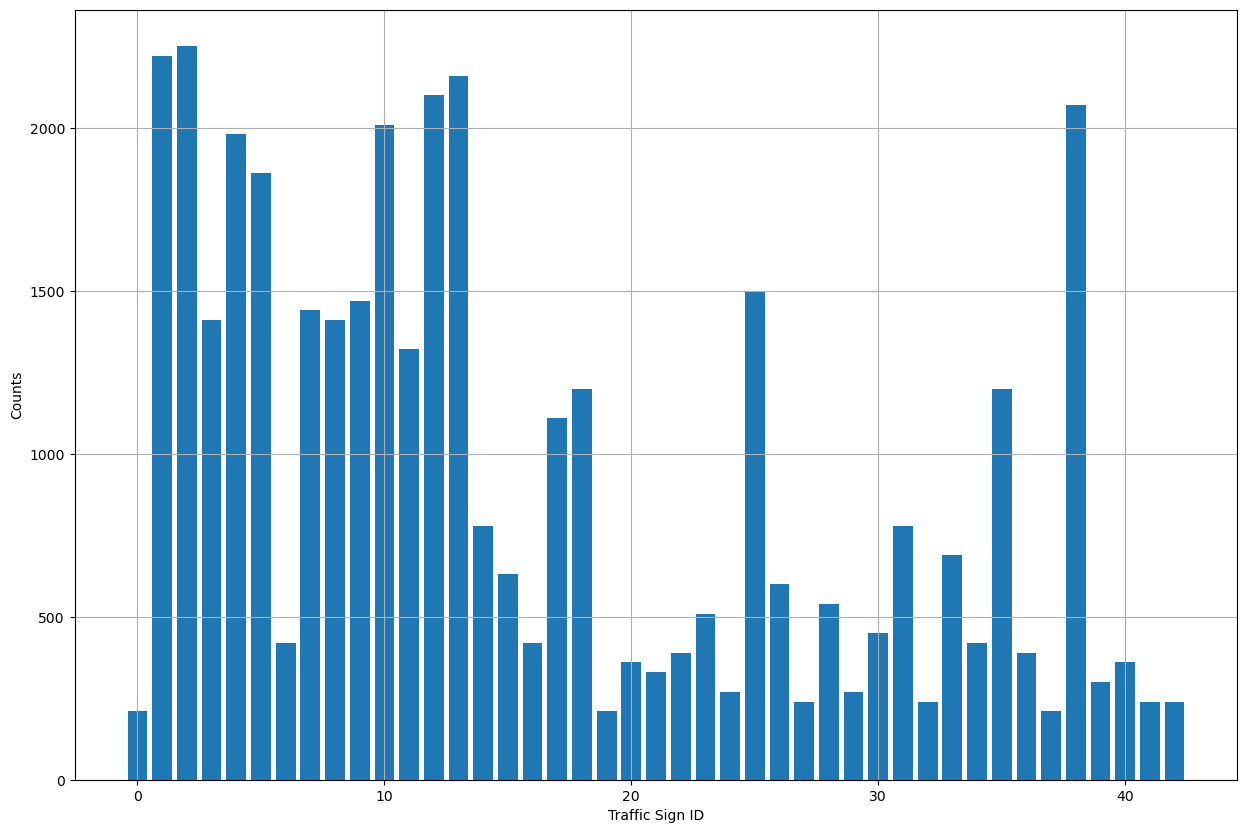

In [66]:
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why? \
  This dataset is unbalanced since there is  approx. 10 times difference between the most and the least populated class
* Are there any classes that are (significantly) over-represented or under-represeneted? \
  Yes, classes 1, 2, 4, 5, 10, 12, 13, 38 are over-presented while classes 0, 6, 16, 19, 20, 21, 22, 23, 24, 27, 28, 29, \
  30, 32, 34, 36, 37, 39, 40, 41, 42 are under-presented

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

In [56]:
resolutions = dict()
def hist_round(resolution):
    # To reduce amount of resolutions on histogram rounding them up to a limit
    # (lesser than 1000 pixels, from 1000 to 2000 pixels etc.)
    limit_resolutions = [1000, 2000, 5000, 10000, 20000, 30000, 40000, 50000, 60000]
    for limit_res in limit_resolutions:
        if resolution <= limit_res:
            return limit_res
    
for i in range(num_samples):
    resolution = hist_round(data.iloc[i]['Width'] * data.iloc[i]['Height'])
    resolutions.setdefault(resolution, [0] * 43)[data.iloc[i]['ClassId']] += 1
    resolutions = OrderedDict(sorted(resolutions.items()))

<Axes: xlabel='Class Id'>

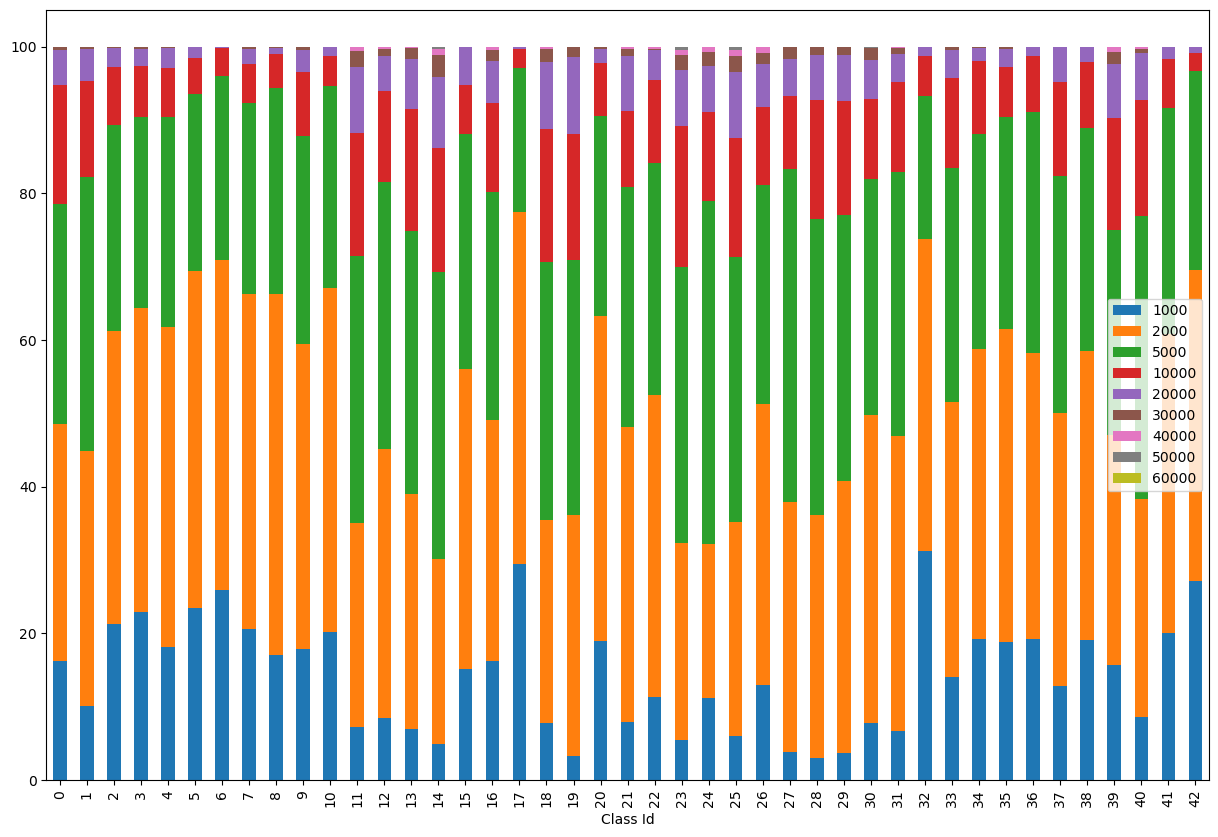

In [68]:
# Inverting dict with resolution data from (resolution : [class_id_0 amount, class_id_1 amount ...])
# to list [[class_id_1, resolution_1 amount, resolution_2 amount ...], [class_id_2, ...]]
# for further processing by plotter
data_frame = []
for i in range(43):
    data_frame.append([0] * (len(resolutions.keys()) + 1))

for class_id in range(43):
    data_frame[class_id][0] = class_id
    for i, res in enumerate(resolutions.keys()):
        # Performing data normalization to percentage for each resolution per class
        data_frame[class_id][i + 1] = resolutions[res][class_id] / hist[class_id] * 100

data_frame = pd.DataFrame(data_frame, columns=['Class Id'] + list(resolutions.keys()))
data_frame.plot(x='Class Id', kind='bar', stacked=True)

In [61]:
brightness_data = dict()
for i in range(num_samples):
    img = cv2.imread(os.path.join(root, data.iloc[i]['Path']))
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    brightness = cv2.mean(gray)[0]
    # As for resolution reducing amount of brightness values rounding them up to nearest 50
    brightness -= brightness % -50
    brightness_data.setdefault(brightness, [0] * 43)[data.iloc[i]['ClassId']] += 1
    brightness_data = OrderedDict(sorted(brightness_data.items()))

<Axes: xlabel='Class Id'>

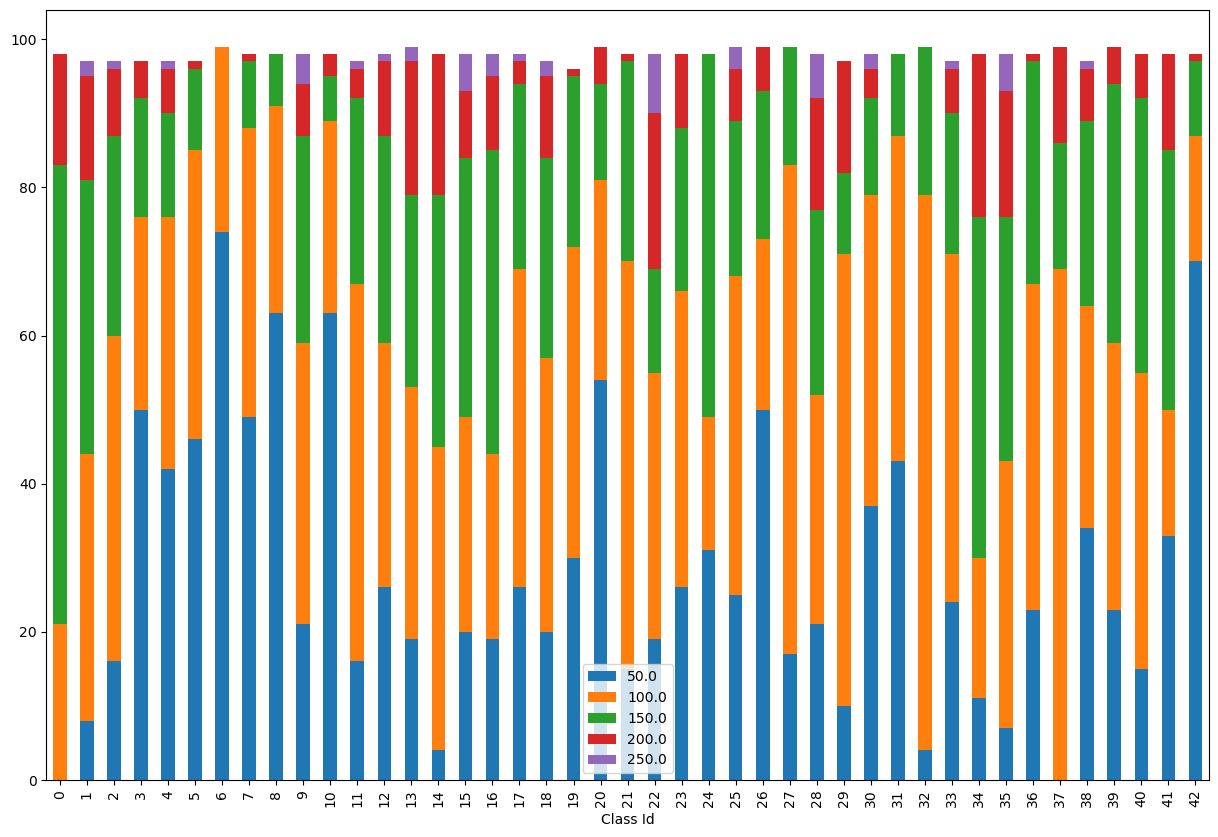

In [69]:
data_frame = []
for i in range(43):
    data_frame.append([0] * (len(brightness_data.keys()) + 1))

for class_id in range(43):
    data_frame[class_id][0] = class_id
    for i, res in enumerate(brightness_data.keys()):
        data_frame[class_id][i + 1] = brightness_data[res][class_id] / hist[class_id] * 100

data_frame = pd.DataFrame(data_frame, columns=['Class Id'] + list(brightness_data.keys()))
data_frame.plot(x='Class Id', kind='bar', stacked=True)

In [ ]:
On histograms made we can see that resolutions and brightnesses olse distributed unevenly for different classes